## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
PATIENCE = [10, 15, 20, 25]

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for patience in PATIENCE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()

    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)

    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    earlystop = EarlyStopping(monitor="val_loss", 
                              patience=patience, 
                              verbose=1
                              )
    
    model.fit(x_train, y_train, 
      epochs=EPOCHS, 
      batch_size=BATCH_SIZE, 
      validation_data=(x_test, y_test), 
      shuffle=True,
      callbacks=[earlystop]
     )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "patience-%d" % patience
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0719 12:53:55.044829  3032 deprecation_wrapper.py:119] From C:\Users\KCB-SA\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:92: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0719 12:53:55.045826  3032 deprecation_wrapper.py:119] From C:\Users\KCB-SA\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0719 12:53:55.141602  3032 deprecation_wrapper.py:119] From C:\Users\KCB-SA\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:99: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 12:53:55.143596  3032 deprecation_wrapper.py:119] From C:\Users\KCB-SA\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:514: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 12:53:55.147586  30

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 4s 86us/step - loss: 1.3698 - acc: 0.5239 - val_loss: 1.5385 - val_acc: 0.4608
Epoch 9/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.3378 - acc: 0.5353 - val_loss: 1.5231 - val_acc: 0.4603
Epoch 10/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.3060 - acc: 0.5475 - val_loss: 1.5115 - val_acc: 0.4656
Epoch 11/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.2794 - acc: 0.5559 - val_loss: 1.4931 - val_acc: 0.4775
Epoch 12/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.2538 - acc: 0.5651 - val_loss: 1.4859 - val_acc: 0.4784
Epoch 13/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.2268 - acc: 0.5772 - val_loss: 1.4739 - val_acc: 0.4874
Epoch 14/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.2018 - acc: 0.5854 - val_loss: 1.4720 - val_acc: 0.4796
Epoch 15/50
50000/50000 [======================

Epoch 22/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.0278 - acc: 0.6491 - val_loss: 1.4950 - val_acc: 0.4775
Epoch 23/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.0054 - acc: 0.6589 - val_loss: 1.4802 - val_acc: 0.4924
Epoch 24/50
50000/50000 [==============================] - 4s 85us/step - loss: 0.9839 - acc: 0.6672 - val_loss: 1.4651 - val_acc: 0.4918
Epoch 25/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.9644 - acc: 0.6744 - val_loss: 1.4844 - val_acc: 0.4922
Epoch 26/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.9444 - acc: 0.6830 - val_loss: 1.4870 - val_acc: 0.4908
Epoch 27/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.9248 - acc: 0.6882 - val_loss: 1.4827 - val_acc: 0.4943
Epoch 28/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.9042 - acc: 0.6981 - val_loss: 1.4937 - val_acc: 0.4957
Epoch 29/50
50000/50000 [=========

Epoch 34/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.7816 - acc: 0.7480 - val_loss: 1.5066 - val_acc: 0.4966
Epoch 35/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.7623 - acc: 0.7554 - val_loss: 1.5104 - val_acc: 0.4946
Epoch 36/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.7422 - acc: 0.7629 - val_loss: 1.5208 - val_acc: 0.4934
Epoch 37/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.7234 - acc: 0.7711 - val_loss: 1.5244 - val_acc: 0.4933
Epoch 38/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.7059 - acc: 0.7786 - val_loss: 1.5230 - val_acc: 0.4976
Epoch 39/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.6872 - acc: 0.7864 - val_loss: 1.5334 - val_acc: 0.4989
Epoch 40/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.6657 - acc: 0.7937 - val_loss: 1.5633 - val_acc: 0.4949
Epoch 41/50
50000/50000 [=========

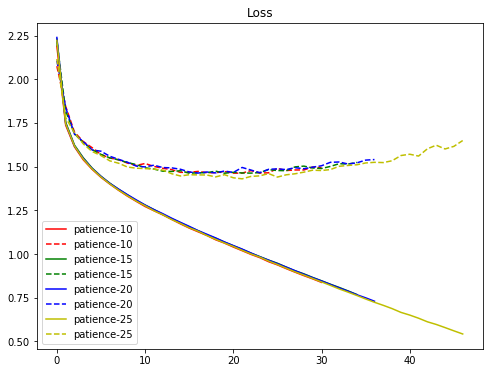

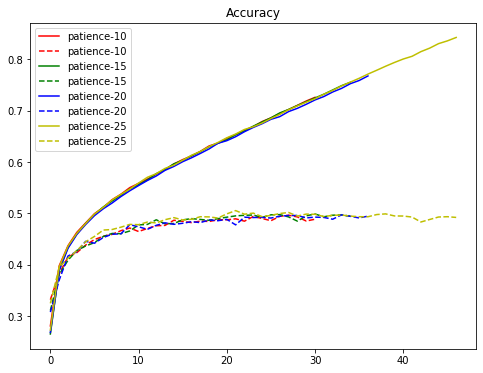

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()